In [4]:
import os
import pandas as pd
from AllSensorLogger_convert import convert_AllSenosr_log
convert_AllSenosr_log('data/data1', '23.05.21-12_12_19.csv')
convert_AllSenosr_log('data/data2', '23.05.21-12_13_20.csv')
convert_AllSenosr_log('data/data3', '23.05.21-12_15_11.csv')
data1 = pd.read_csv('data/data1/Rot.csv')
data2 = pd.read_csv('data/data2/Rot.csv')
data3 = pd.read_csv('data/data3/Rot.csv')

<Axes: xlabel='timestamp', ylabel='value'>

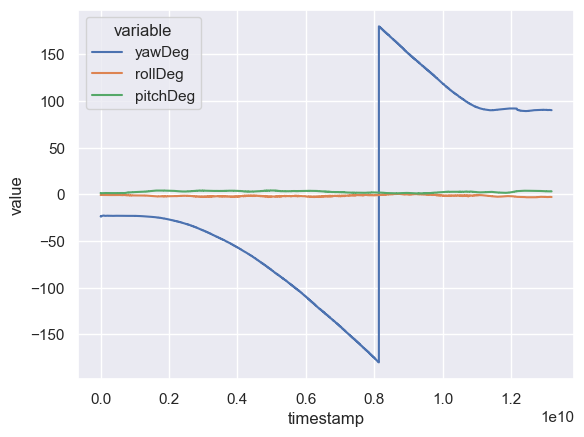

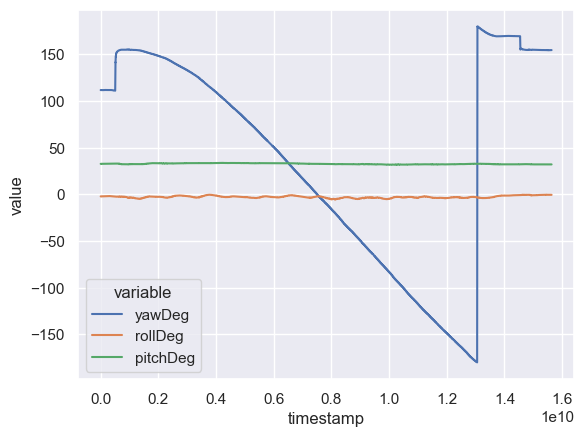

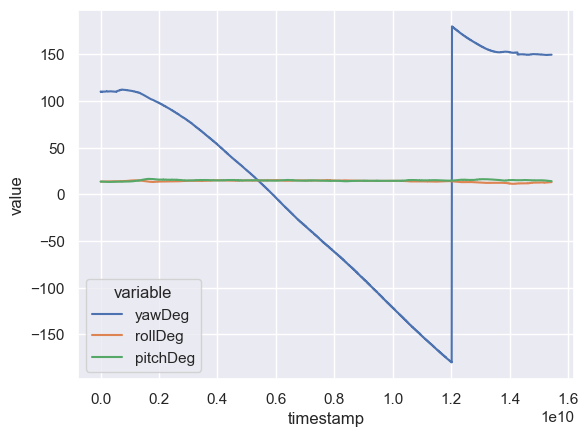

In [8]:
from scipy.spatial.transform import Rotation as R

data1['timestamp'] = data1['elapsedRealtimeNanos']-data1['elapsedRealtimeNanos'][0]
data2['timestamp'] = data2['elapsedRealtimeNanos']-data2['elapsedRealtimeNanos'][0]
data3['timestamp'] = data3['elapsedRealtimeNanos']-data3['elapsedRealtimeNanos'][0]

data1[['rollDeg', 'pitchDeg', 'yawDeg']] = R.from_quat(data1[['quaternionX','quaternionY','quaternionZ','quaternionW']]).as_euler('yxz', degrees=True)
data2[['rollDeg', 'pitchDeg', 'yawDeg']] = R.from_quat(data2[['quaternionX','quaternionY','quaternionZ','quaternionW']]).as_euler('yxz', degrees=True)
data3[['rollDeg', 'pitchDeg', 'yawDeg']] = R.from_quat(data3[['quaternionX','quaternionY','quaternionZ','quaternionW']]).as_euler('yxz', degrees=True)

# data1[['yawDeg', 'pitchDeg', 'rollDeg']] = R.from_quat(data1[['quaternionX','quaternionY','quaternionZ','quaternionW']]).as_euler('zxy', degrees=True)
# data2[['yawDeg', 'pitchDeg', 'rollDeg']] = R.from_quat(data2[['quaternionX','quaternionY','quaternionZ','quaternionW']]).as_euler('zxy', degrees=True)
# data3[['yawDeg', 'pitchDeg', 'rollDeg']] = R.from_quat(data3[['quaternionX','quaternionY','quaternionZ','quaternionW']]).as_euler('zxy', degrees=True)

df1 = pd.melt(data1[['timestamp', 'yawDeg', 'rollDeg', 'pitchDeg']], id_vars=['timestamp'], value_vars=['yawDeg', 'rollDeg', 'pitchDeg'])
df2 = pd.melt(data2[['timestamp', 'yawDeg', 'rollDeg', 'pitchDeg']], id_vars=['timestamp'], value_vars=['yawDeg', 'rollDeg', 'pitchDeg'])
df3 = pd.melt(data3[['timestamp', 'yawDeg', 'rollDeg', 'pitchDeg']], id_vars=['timestamp'], value_vars=['yawDeg', 'rollDeg', 'pitchDeg'])
import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib.pyplot as plt

fig = plt.figure()
sns.lineplot(x="timestamp", y="value", hue="variable", data=df1)
fig = plt.figure()
sns.lineplot(x="timestamp", y="value", hue="variable", data=df2)
fig = plt.figure()
sns.lineplot(x="timestamp", y="value", hue="variable", data=df3)

In [4]:
import torch

data = torch.randn(2, 3, 5)

print(data)
m = torch.nn.LayerNorm(5)

print(m(data))

tensor([[[-0.3329,  0.7798,  0.5975, -1.2879,  1.7080],
         [ 0.0608,  1.8422, -1.0189, -2.5967, -2.3575],
         [-0.8903,  1.6182, -2.2916, -0.4174, -0.7890]],

        [[ 0.0483,  0.2961, -0.8362, -1.7881, -1.9790],
         [ 0.0585, -1.0599, -0.9297, -3.4598, -0.5306],
         [-0.9974,  0.8717, -0.7167, -0.3457, -0.3528]]])
tensor([[[-0.6123,  0.4764,  0.2980, -1.5467,  1.3846],
         [ 0.5339,  1.6212, -0.1250, -1.0880, -0.9420],
         [-0.2671,  1.7254, -1.3802,  0.1085, -0.1867]],

        [[ 0.9734,  1.2413,  0.0169, -1.0126, -1.2190],
         [ 1.0335,  0.1035,  0.2117, -1.8923,  0.5436],
         [-1.0797,  1.8483, -0.6400, -0.0588, -0.0699]]],
       grad_fn=<NativeLayerNormBackward0>)


In [5]:
scores = [[0], [0], [0]]
print(scores)
def add_1(x):
    x[0] += 1
    return x
scores = tuple(map(add_1, scores))
print(scores)

[[0], [0], [0]]
([1], [1], [1])
